<a href="https://colab.research.google.com/github/SithJester/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Michael_Brown_Unit_1_Sprint_Challenge_EDIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!wget http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

--2020-05-19 00:35:32--  http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Haberman's+Survival’

Haberman's+Survival     [ <=>                ]  10.65K  --.-KB/s    in 0s      

2020-05-19 00:35:33 (169 MB/s) - ‘Haberman's+Survival’ saved [10907]



In [3]:
!ls *csv

ls: cannot access '*csv': No such file or directory


In [4]:
## Read in data

Data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
print(Data.shape)
Data.head()

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
## Check for missing values

Data.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [6]:
## Name the features

Data.rename(columns={'30':'Patient_Age','64':'Op_Year','1':'Pos_AuxNodes','1.1':'Survived_+5yr(Y/N)'},inplace=True)

Data.head()

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
## Identify the data type for this column,
# in order to use the right dtype to make changes

Data['Survived_+5yr(Y/N)'].dtypes

dtype('int64')

In [0]:
## Assigning binary data traditional values

Data.loc[Data['Survived_+5yr(Y/N)']==1,'Survived_+5yr(Y/N)']=0
Data.loc[Data['Survived_+5yr(Y/N)']==2,'Survived_+5yr(Y/N)']=1

In [9]:
## Checking the change
Data.sample(3)

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
158,53,60,9,1
246,63,62,0,0
191,56,60,0,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [10]:
## Looking at the column

Data['Pos_AuxNodes'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Pos_AuxNodes, dtype: float64

In [11]:
## Trying to see the relationship between 
# the 'Nodes' measured, and survival rate

Table1 = pd.crosstab(Data['Pos_AuxNodes'],Data['Survived_+5yr(Y/N)'])

Table1

Survived_+5yr(Y/N),0,1
Pos_AuxNodes,,
0,117,19
1,32,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2


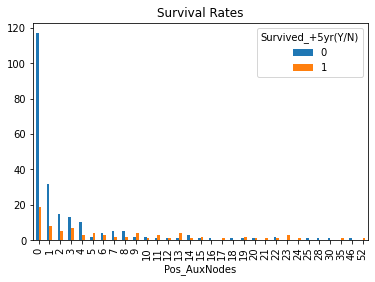

In [12]:
# Simple plot to illustrate the data

Table1.plot(kind='bar',title='Survival Rates');

In [0]:
Table1.drop([0][0],inplace=True)

In [14]:
Table1

Survived_+5yr(Y/N),0,1
Pos_AuxNodes,,
1,32,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2
9,2,4


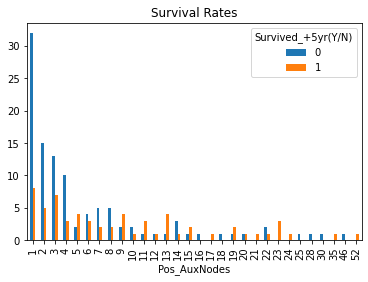

In [15]:
## Excluding those patients where no Nodes were found, 
## Our data is a bit closer together

Table1.plot(kind='bar',title='Survival Rates');

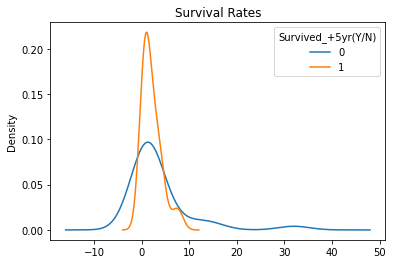

In [16]:
Table1.plot(kind='density',title='Survival Rates');

In [17]:
## Looking at the min/max & density of age

Data['Patient_Age'].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Patient_Age, dtype: float64

In [18]:
## Splitting the groups to see which age group the
## highest concentration of patients measured are


Young = Data[Data['Patient_Age'].between(30 ,44)]
print(Young['Patient_Age'].value_counts().sum())

## Creating a table showing only the survivors
Young_Survivor = Young.loc[Young['Survived_+5yr(Y/N)']==1]
Young_Survivor.head()


79


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
6,34,59,0,1
7,34,66,9,1
23,38,69,21,1
33,39,66,0,1
42,41,60,23,1


In [19]:
## Making a comparison to see how the Survival is split within the age group

Young_Lost = Young.loc[Young['Survived_+5yr(Y/N)']==0]
print(Young_Lost['Patient_Age'].value_counts().sum())
Young_Lost.sample(5)

63


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
26,38,60,0,0
29,38,66,0,0
71,43,66,4,0
59,42,65,0,0
66,43,64,2,0


In [20]:
## Middle age

Mid = Data[Data['Patient_Age'].between(45,61)]
print(Mid['Patient_Age'].value_counts().sum())
Mid_Survivor = Mid.loc[Mid['Survived_+5yr(Y/N)']==1]
Mid_Survivor.sample(5)

158


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
157,53,59,3,1
168,54,65,5,1
155,53,58,4,1
228,61,62,5,1
180,55,68,15,1


In [21]:
Mid_Lost = Mid.loc[Mid['Survived_+5yr(Y/N)']==0]
print(Mid_Lost['Patient_Age'].value_counts().sum())
Mid_Lost.sample(5)

112


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
165,53,63,0,0
84,45,59,14,0
129,50,58,1,0
82,45,60,0,0
153,52,65,0,0


In [22]:
## Older patients

Oldest = Data[Data['Patient_Age'].between(62,83)]
print(Oldest['Patient_Age'].value_counts().sum())
Oldest_Survivor = Oldest.loc[Oldest['Survived_+5yr(Y/N)']==1]
Oldest_Survivor.head()


68


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
237,62,59,13,1
238,62,58,0,1
239,62,65,19,1
244,63,60,1,1
257,65,58,0,1


In [23]:
Oldest_Lost = Oldest.loc[Oldest['Survived_+5yr(Y/N)']==0]
print(Oldest_Lost['Patient_Age'].value_counts().sum())
Oldest_Lost.sample(5)

49


,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
255,64,61,0,0
249,63,66,0,0
282,69,65,0,0
289,70,59,8,0
269,66,58,0,0


In [24]:
## Group the survivors and patients lost,
## to get the survival rate of the entire data set

All_Surv = pd.concat([Young_Survivor,Mid_Survivor,Oldest_Survivor])
All_Surv.sample(5)

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
156,53,65,1,1
273,67,63,1,1
239,62,65,19,1
198,57,64,1,1
268,66,61,13,1


In [25]:
All_Lost = pd.concat([Young_Lost,Mid_Lost,Oldest_Lost])
All_Lost.sample(5)

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
261,65,58,0,0
130,50,59,2,0
54,42,58,0,0
251,63,61,28,0
128,50,63,1,0


In [0]:
Young_rate = (Young_Survivor['Patient_Age'].value_counts().sum()) - (Young_Lost['Patient_Age'].value_counts().sum())
Mid_rate = (Mid_Survivor['Patient_Age'].value_counts().sum()) - (Mid_Lost['Patient_Age'].value_counts().sum())
Oldest_rate = (Oldest_Survivor['Patient_Age'].value_counts().sum()) - (Oldest_Lost['Patient_Age'].value_counts().sum())

In [27]:
print(Young_rate)
print(Mid_rate)
print(Oldest_rate)

-47
-66
-30


In [28]:
Surv_rate = All_Surv['Patient_Age'].value_counts().sum() - All_Lost['Patient_Age'].value_counts().sum()

Surv_rate

-143

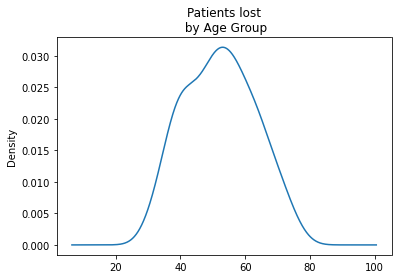

In [29]:
All_Lost['Patient_Age'].plot(kind='density',title='Patients lost\n by Age Group');

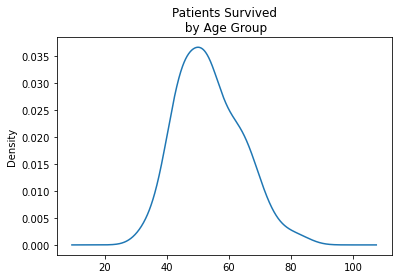

In [30]:
All_Surv['Patient_Age'].plot(kind='density',title= 'Patients Survived\n by Age Group');

## By examining the age groups by survival rate we can see that there is a higher concentration of survivors within younger patients, and overall 

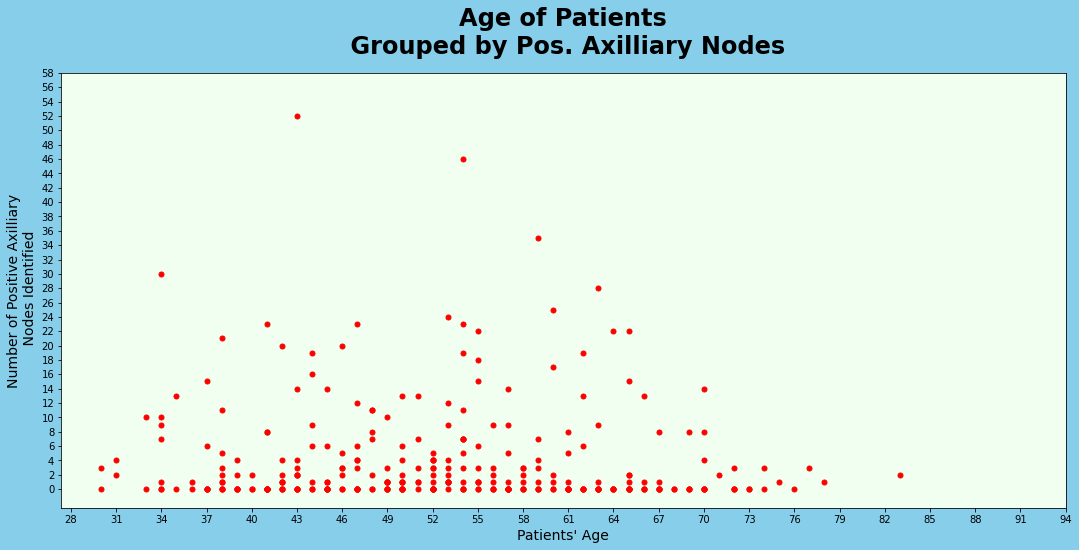

In [31]:
fig, ax = plt.subplots(figsize=(18,8))
fig.patch.set(facecolor="skyblue")

ax.scatter(x=Data['Patient_Age'],y=Data['Pos_AuxNodes'],color='red',s=25)
ax.set(facecolor='honeydew')

ax.set_title("Age of Patients\n Grouped by Pos. Axilliary Nodes",
             fontsize=24, 
             x=.5, 
             y=1.03,
             fontweight='bold')

ax.set_xlabel("Patients' Age", fontsize=14)
ax.set_ylabel("Number of Positive Axilliary\n Nodes Identified", fontsize=14)

ax.set_xticks(range(28,95,3))
ax.set_yticklabels(range(0,60,2),fontsize=10)
ax.set_yticks(range(0,60,2));

## >Sprint Retrospective turned in<

In [32]:
Data.head()

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0


In [33]:
Data['Op_Year'].value_counts().sort_index()

58    36
59    27
60    28
61    26
62    23
63    30
64    30
65    28
66    28
67    25
68    13
69    11
Name: Op_Year, dtype: int64

In [34]:
Early_Op = Data[Data['Op_Year'].between(58,61)]
Early_Op.reset_index(inplace=True)
Early_Op.head()

,index,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
0,2,31,59,2,0
1,4,33,58,10,0
2,5,33,60,0,0
3,6,34,59,0,1
4,8,34,58,30,0


In [35]:
Early_Op['Patient_Age'].describe()

count    117.000000
mean      51.367521
std       10.699338
min       31.000000
25%       42.000000
50%       52.000000
75%       60.000000
max       83.000000
Name: Patient_Age, dtype: float64

In [36]:
Mid_Op = Data[Data['Op_Year'].between(62,65)]
Mid_Op.reset_index(inplace=True)
Mid_Op['Patient_Age'].describe()

count    111.000000
mean      52.576577
std       10.774169
min       30.000000
25%       44.000000
50%       52.000000
75%       59.500000
max       78.000000
Name: Patient_Age, dtype: float64

In [37]:
Late_Op = Data[Data['Op_Year'].between(66,69)]
Late_Op.reset_index()
Early_Op['Patient_Age'].describe()

count    117.000000
mean      51.367521
std       10.699338
min       31.000000
25%       42.000000
50%       52.000000
75%       60.000000
max       83.000000
Name: Patient_Age, dtype: float64

In [38]:
Early_Op_Surv = Early_Op.loc[Early_Op['Survived_+5yr(Y/N)']==1]
Early_Op_Surv.reset_index(inplace=True)
Early_Op_Surv['Patient_Age'].describe()

count    28.000000
mean     55.178571
std      11.079021
min      34.000000
25%      47.500000
50%      53.000000
75%      63.500000
max      83.000000
Name: Patient_Age, dtype: float64

In [39]:
Mid_Op_Surv = Mid_Op.loc[Mid_Op['Survived_+5yr(Y/N)']==1]
Mid_Op_Surv.reset_index(inplace=True)
Mid_Op_Surv['Patient_Age'].describe()

count    36.000000
mean     54.472222
std       9.339581
min      41.000000
25%      47.000000
50%      53.000000
75%      60.250000
max      78.000000
Name: Patient_Age, dtype: float64

In [40]:
Late_Op_Surv = Late_Op.loc[Late_Op['Survived_+5yr(Y/N)']==1]
Late_Op_Surv.reset_index(inplace=True)

Late_Op_Surv['Patient_Age'].describe()

count    17.000000
mean     49.529412
std       9.760364
min      34.000000
25%      42.000000
50%      48.000000
75%      55.000000
max      69.000000
Name: Patient_Age, dtype: float64

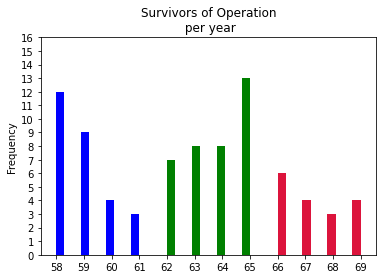

In [41]:
Early_Op_Surv['Op_Year'].plot(kind='hist',color='blue')
Mid_Op_Surv['Op_Year'].plot(kind='hist',color='green')
Late_Op_Surv['Op_Year'].plot(kind='hist',color='crimson',xticks=range(58,70,1),
                             yticks=range(0,17,1),
                             title='Survivors of Operation\n per year');


In [42]:
All_Surv.describe()

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,1.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,1.0
25%,46.000000,59.000000,1.000000,1.0
50%,53.000000,63.000000,4.000000,1.0
75%,61.000000,65.000000,11.000000,1.0
max,83.000000,69.000000,52.000000,1.0


In [43]:
All_Lost.describe()

,Patient_Age,Op_Year,Pos_AuxNodes,Survived_+5yr(Y/N)
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,0.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,0.0
25%,43.000000,60.000000,0.000000,0.0
50%,52.000000,63.000000,0.000000,0.0
75%,60.000000,66.000000,3.000000,0.0
max,77.000000,69.000000,46.000000,0.0


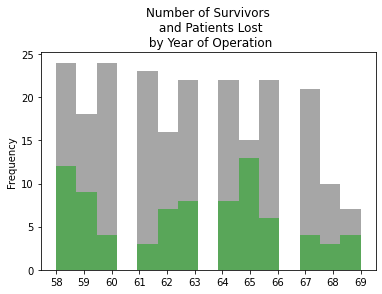

In [44]:
All_Surv['Op_Year'].plot(kind='hist',color='lime',alpha=1,bins=15)
All_Lost['Op_Year'].plot(kind='hist',color='gray',alpha=0.7,bins=15,
                         title = 'Number of Survivors\n and Patients Lost\n by Year of Operation',
                         xticks = range(58,70,1));

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#There is a positive relationship between the success of the operation between 1961 and 1965, as well as how many axilliary nodes were identified, and wether or not the patient survived.



In [0]:
#Mid_Op_Surv['Op_Year'].plot(kind='density',color='green',
#                            title='Improvement in Patient Survival\n 1961-1965');

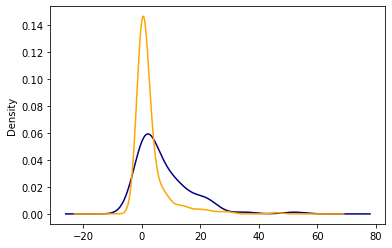

In [50]:
All_Surv['Pos_AuxNodes'].plot(kind='density',color = 'navy')
All_Lost['Pos_AuxNodes'].plot(kind='density',color = 'orange');

# There seems to be a negative relationship with patient age and how many positive axilliary nodes were identified. The less nodes found, the less likely the patient survived +5 years. 

# Based on what we explored; more patients survived +5 years in younger age groups, when more positive axilliary nodes could be identified. The operation also saw the most success between the years of 61-65, when the amount of positive axilliary nodes identified was higher on average and the age of the patient was on the younger side of the spectrum measured.

In [66]:
## 1958 - 1961
Early_Op['Pos_AuxNodes'].mean()

3.9572649572649574

In [65]:
## 1962-1965
Mid_Op['Pos_AuxNodes'].mean()

3.9572649572649574

In [63]:
## 1966-1969
Late_Op['Pos_AuxNodes'].mean()

3.8181818181818183